# Skip-Entry Dynamics

Joe(y) Carpinelli  
12/11/22

> **Note**
>
> The content here was originally written as part of a problem set
> assigned in a graduate launch and entry vehicle design course at the
> University of Maryland. The problem statement was flawed. I believe
> this was deliberate — either way, the assignment was a brilliant
> educational too. I’m thankful for that slight falsehood; it cemented
> my early understanding of spacecraft entry dynamics, and has motivated
> this whole post.

## Artemis 1

Go Artemis! NASA’s first Artemis mission launched successfully in the
earliest hours of November 16th, 2022. Artemis 1 was an uncrewed flight
*test* — the [Orion
spacecraft](https://www.nasa.gov/exploration/systems/orion/index.html)
flew to the moon, arrived in a special kind of stable orbit called a
[*Distant Retrograde
Orbit*](https://www.nasa.gov/feature/orion-will-go-the-distance-in-retrograde-orbit-during-artemis-i).
Of course, NASA’s flight operators in Mission Control captured [stunning
pictures](https://www.nasa.gov/content/artemis-1-images) along the way.
A visual overview for Artemis 1 is shown in [Figure 1](#fig-a1-arch).

Artemis 1 is [record
breaking](https://www.theverge.com/2022/11/29/23484571/artemis-1-halfway-record-distance)
through its furthest achieved distance from Earth, and through one of
its most important test objectives — the first [successfully
test](https://www.lockheedmartin.com/en-us/news/features/2022/orion-heat-shield.html)
of a skip-entry for a human-rated spacecraft. Orion’s heatshield was
tested successfully when it entered Earth atmosphere on December 11th,
2022.

![](https://www.nasa.gov/sites/default/files/thumbnails/image/mission_profile_simple_artemis_i_droarticle_acrane.jpg)

Figure 1: Artemis 1 Mission Architecture

## Atmospheric Entry

Testing a new spacecraft’s capability to safely enter Earth’s atmosphere
is incredibly important. If a spacecraft is to return to Earth in-tact,
it has to survive the fall through Earth’s atmosphere. Returning
spacecraft are hurtling through space at tens of thousands of miles per
hour; as the spacecraft collide with air particles at high speeds, an
enormous amount of heat is generated. To withstand the heat of entering
a planet’s atmosphere from space, spacecraft commonly have a thick metal
component which is oriented towards the atmosphere for the duration of
the atmospheric entry. This metal hardware is referred to as a heat
shield. Artemis 2 will fly four astronauts to a lunar orbit before
returning back to Earth. A successful atmospheric entry in Artemis 1
will prove the Orion spacecraft capable of safely returning astronauts
back to Earth in Artemis 2, and future Artemis missions.

The *angle* of a spacecraft’s flight into Earth’s atmosphere (mostly)
determines the *kind* of atmospheric entry: ballistic, lifting, or
skipping. A steep entry will cause the spacecraft to *cannonball*
through Earth’s atmosphere; if we model this scenario while *ignoring
the force of gravity on the spacecraft*, the spacecraft’s trajectory is
*ballistic*. A slightly less steep entry will allow the atmosphere to
*lift* the spacecraft as it descends; this force exerted by the
atmosphere on the spacecraft is similar to how airplanes fly, and this
flavor of atmospheric entry is known as *lifting* entry. Finally,
entering the atmosphere at a shallow angle will cause the spacecraft to
*skip* across the atmosphere like a rock on a pond; this is known as a
*skipping* entry.

No human-rated vehicle as *ever* completed a skip-entry before
Artemis 1. Orion is the first! There are [many
benefits](https://www.lockheedmartin.com/en-us/news/features/2022/orion-skip-maneuver.html)
to skip-entries, including lower accelerations experienced by
astronauts, more precise landing targets, and lower temperatures on the
heat shield. While the benefits of skip-entries are real, all
atmospheric entries are incredibly sensitive. Enter the atmosphere at
too steep an angle, and the spacecraft will burn up in the atmosphere.
Enter the atmosphere at too shallow an angle, and the spacecraft will
skip too far and fly out into space, never to return. Rigorous
calculations must be made to ensure the spacecraft is entering the
atmosphere at the right angle, and the right speed. With a few
simplifying assumptions, the math behind atmospheric entry can be simple
enough to fit in a blog post! Don’t believe me? Read on!

## Entry Dynamics

We can simulate the Orion spacecraft’s trajectory through the atmosphere
with just a couple dozen lines of code! To build a semi-accurate model
for how a spacecraft enters Earth’s atmosphere, we’ll need to simplify
the problem by make some assumptions. For example, let’s completely
ignore winds! We should also ignore parachutes — we will just assume
parachutes deploy successfully at *some* altitude. Let’s pretend the
Orion spacecraft is completely rigid by ignoring the possibility of any
bending or flexing in the structure that could affect the aerodynamics
throughout entry. Also, we are leaving out all considerations related to
heat! No thermodynamic modeling in this post. We will assume the heat
shield is capable of handling any entry we throw at it.

> **Note**
>
> The word *model* might seem a bit abstract. What does a model look
> like? A model can be thought of as the combination of two things:
> simplifying assumptions, and equations which rely on the simplifying
> assumptions. So all we need to build a model is to list the
> assumptions we make, and use those assumptions to write equations.
> Hey! That’s only two things!

There are many other assumptions we’re making implicitly in this
problem. While we can’t possibly list them all, let’s go into some more
depth for a couple of the most important assumptions our model will rely
on.

### Exponential Atmosphere

Earth’s atmosphere will exert aerodynamic forces on the Orion
spacecraft. If we ignore wind, these aerodynamic forces will depend on
some aerodynamic coefficients, the spacecraft’s airspeed and
orientation, as well as the *density* of the atmosphere. This
atmospheric density will vary with altitude! We can create a *very*
simple model for Earth’s atmosphere by assuming the density decays
*exponentially* as altitude increases. The core equation for $\rho$, the
atmospheric density, will depend on altitude above sea level $h$, the
atmospheric density at sea level $\rho_0$, and a scaling factor $h_s$
which is unique to each planet. For Earth, an accurate scaling factoris
approximately equal to $7524$ meters.

<span id="eq-exp-atm">$$
\rho = \rho_0 e^\frac{-h}{h_s}
 \qquad(1)$$</span>

### Aerodynamic Coefficients

The aerodynamic forces on Orion can be summarized by a few aerodynamic
coefficients: the ballistic coefficient $\beta$, the coefficient of drag
$C_D$, and the lifting coefficient $C_L$. The coefficients of lift and
drag are commonly combined into one value: the *lift to drag ratio*
$C_R$. For this post, one value for Orion’s $C_R$ will be assumed. The
ballistic coefficient can be calculated using the vehicle’s mass, lift
to drag ratio, and the surface area of the heat shield, as shown in
[Equation 3](#eq-ballistic-coeff).

<span id="eq-l-to-d">$$
C_R = \frac{C_L}{C_D}
 \qquad(2)$$</span>

<span id="eq-ballistic-coeff">$$
\beta = \frac{m}{C_R A_s}
 \qquad(3)$$</span>

Code which calculates the ballistic coefficient, and other calculations
relevant to atmospheric entry dynamics, is provided below.

``` julia
"""
Calculate the ballistic coefficient, β.
"""
β(m, Cᵣ, Aₛ) = m / (Cᵣ * Aₛ)

"""
Calculate the derivative of the downrange distance, ḋ.
"""
ḋ(ν, γ) = ν * cos(γ)

"""
Calculate the terminal velocity, vₜ.
"""
vₜ(g, β, ρ, γ) = √(-2g * β * sin(γ) / ρ)

"""
Calculate the maximum deceleration, nₘ.
"""
nₘ(vₑ, γ, hₛ, e) = (vₑ^2 / hₛ) * (sin(γ) / 2e)
```

### Equations of Motion

With all of the assumptions described above, we can write the *equations
of motion* for a spacecraft as it flies through a planet’s atmosphere.
The equations shown through math and code below describe how **four**
specific values change with time as the spacecraft flies: the angle of
the spacecraft’s velocity with respect to the spacecraft’s horizontal
axis $\gamma$, the airspeed $v$, the distance to Earth’s center $r$, and
the angle of the spacecraft’s position with respect to the horizontal
along the Earth’s center $\theta$. Please accept these equations as
“given” for now. Check back later and there might be an expanded
explanation posted as an update!

<span id="eq-core-eom">$$
\begin{align} 
  \dot{\gamma} &= \frac{1}{v} \left( L_m - (1 - \frac{v^2}{v_c^2}) g \cos{\gamma} \right) \\ 
  \dot{v} &= -D_m - g \sin{\gamma} \\ 
  \dot{r} &= v \sin{\gamma} \\ 
  \dot{\theta} &= \frac{v}{r} \cos{\gamma} \\ 
\end{align}
 \qquad(4)$$</span>

The code below defines a function, `CanonicalEntry`, which produces the
equations of motion for a spacecraft’s atmospheric entry along a plane
*in code*.

In [3]:
using Memoize: @memoize
using Symbolics, ModelingToolkit
using PhysicalConstants.CODATA2018: NewtonianConstantOfGravitation as G₀

"""
Construct a model for entry dynamics.
"""
@memoize function CanonicalEntry(; name = :CanonicalEntry, simplify = true, structural_simplify = true)

  @variables t
  
  x = @variables γ(t) v(t) r(t) θ(t)
  p = @parameters r₀ ρ₀ hₛ β Cᵣ μ
  δ = Differential(t)

  vc = √(μ / r)
  g₀ = μ / r₀^2
  g = g₀ * (r₀ / r)^2
  h = r - r₀
  ρ = ρ₀ * exp(-h / hₛ)
  Dₘ = (ρ / 2) * v^2 / β
  Lₘ = Cᵣ / Dₘ

  eqs = [
    δ(γ) ~ (1/v) * (Lₘ - (1 - (v/vc)^2) * g * cos(γ)),
    δ(v) ~ -Dₘ - g * sin(γ),
    δ(r) ~ v * sin(γ),
    δ(θ) ~ (v / r) * cos(γ)
  ]

  if simplify
    map!(ModelingToolkit.simplify, eqs, eqs)
  end

  model = ODESystem(
    eqs, t; name = name,
  )

  if structural_simplify
    model = ModelingToolkit.structural_simplify(model)
  end

  return model
 
end

Calling `CanonicalEntry` produces a model object, which we can inspect
for the equations of motion written mathematically. This expands all of
the equations; the output looks a lot more complicated than
[Equation 4](#eq-core-eom)! Thank goodness for computers.

In [4]:
model = CanonicalEntry()
model |> equations .|> ModelingToolkit.simplify

## Simulated Skip-Entry

### Backstory

In 2020, I took a graduate Launch & Entry Vehicle Design course at the
University of Maryland. The course was taught by
[Dr. Akin](spacecraft.ssl.umd.edu), and one of our homework assignments
was to simulate a *lifting entry* for the Orion spacecraft. One of my
classmates and I easily spent 20+ hours trying to make the simulation
work, but no matter what we tried, the simulated entry did not seem to
be a lifting entry. We turned in the assignment the day it was due, and
hoped for grading mercy — which we received, thankfully! Dr. Akin
apologized when we turned it in — he had *said* lifting entry, but
really the initial conditions he gave us instead produced a *skip*
entry! I forgot all about this for months, until I reviewed recorded
lecture videos from a previous year of the course while preparing for an
exam. I came across a lecture from years earlier, where my professor
gave *the same apology* to *that* class!

I don’t mean to make any accusations, but I suspect that mix-up was
intentional! Regardless of the intent, the effect was brilliant. I’ve
never forgotten those couple of lectures introducing atmospheric entry.
Plus, the assignment motivated a fun blog post!

### Initial Conditions

To simulate Orion’s skip-entry, we need initial conditions. Let’s assume
the initial conditions provided in [Table 1](#tbl-ic). We can “plug”
these conditions into the dynamics described previously to simulate an
atmospheric skipping entry!

| Symbol   | Description                      | Value                | Units                            |
|---------|-----------------------|------------------|-----------------------|
| $m$      | Orion Mass                       | $10,400$             | kilograms                        |
| $A_s$    | Heatshield Surface Area          | $19.635$             | square meters                    |
| $C_R$    | Lift to Drag Ratio               | $0.25$               | meter squared per quartic second |
| $\beta$  | Ballistic Coefficient            | $441.39$             | kilograms per meter squared      |
| $\rho_0$ | Atmospheric Density at Sea Level | $1.226$              | kilograms per meter cubed        |
| $h_s$    | Atmospheric Scaling Factor       | $7524$               | meters                           |
| $\mu$    | Earth’s Mass Parameter           | $3.986 \times 10^14$ | meters per second cubed          |
| $r_0$    | Earth’s Radius                   | $6378$               | kilometers                       |
| $\gamma$ | Entry Flight Path Angle          | $-2.5^\circ$         | degrees                          |
| $v$      | Entry Velocity                   | $8.939$              | kilometers per second            |
| $r$      | Entry Radius                     | $6500.1$             | kilometers                       |
| $\theta$ | Entry Angular Position           | $349.3^\circ$        | degrees                          |

Table 1: Initial Conditions for Skip Entry

### Simulation

Finally — let’s simulate Orion’s entry into Earth’s atmosphere, and plot
the spacecraft altitude across time. Do you see the altitude jump before
Orion finally descends to the Earth’s surface? That’s the spacecraft
skipping across the atmosphere — just like a rock skips across a pond,
if the rock was moving at tens of thousands of miles per hour.

This is a really fun exercise. By breaking the problem down to
first-principles, we can predict the behavior of a really complicated
system. Thanks to Dr. Akin for assigning this problem over two years
ago, and thanks to my friend and classmate Kate for banging her head
against the wall with me to figure this out. Finally, thanks to you for
reading!

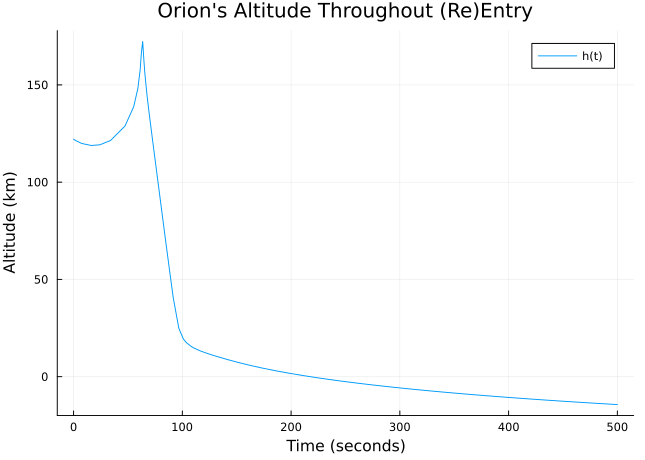

In [5]:
using Plots
using Unitful
using DifferentialEquations

let time = NaN # the time does not matter!

f = ODEFunction(model)

m = 10.4e3u"kg"
A = 19.635u"m^2" 
C = 0.25u"m^2/s^4"
β = 441.39u"kg/m^2"
ρ = 1.226u"kg/m^3"
h = 7524.0u"m"
μ = 3.986e14u"m^3/s^2"
R = 6378u"km"
γ = -2.5u"°"
v = 8.939u"km/s"
r = 6500.1u"km"
θ = 349.3u"°"

states = [
  γ, v, r, θ,
] .|> upreferred .|> ustrip

parameters = [
  C, R, h, μ, ρ, β
] .|> upreferred .|> ustrip

sealevel(u,t,integrator) = u[3] == ustrip(upreferred(R))
impact = ContinuousCallback(sealevel, terminate!)

problem = ODEProblem(
  model, states, (0.0, 500.0), parameters, 
)

trajectory = solve(problem; callback = impact, abstol = reltol = 1e-12)

altitude = map(
  u -> ustrip(u"km", u[3] * u"m" - R),
  trajectory.u,
)

plot(
  trajectory.t, altitude;
  title = "Orion's Altitude Throughout (Re)Entry",
  label = "h(t)",
  xlabel = "Time (seconds)",
  ylabel = "Altitude (km)",
)

end